In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.special as sps
from scipy.stats import kurtosis, skew
import warnings
from sklearn.datasets import load_diabetes

%matplotlib inline
plt.rcParams["figure.figsize"] = (10.0, 7.0)
warnings.filterwarnings("ignore")

In [4]:
ns = 50000
ns_sub = 1000
n_mean = 1000
n_sigma = 5000

n1_mean = 2000
n2_mean = 6000

n1_sigma = 500
n2_sigma = 1000

In [5]:
dfn = np.random.normal(n_mean, n_sigma, ns)
dfn = pd.DataFrame(dfn, columns=["volume"])
dfn.volume = round(dfn.volume, 0)

In [6]:
l1 = np.random.normal(n1_mean, n1_sigma, ns)
dfl1 = pd.DataFrame(l1, columns=["volume"])
dfl1.volume = round(dfl1.volume, 0)

In [7]:
l2 = np.random.normal(n2_mean, n2_sigma, ns)
dfl2 = pd.DataFrame(l2, columns=["volume"])
dfl2.volume = round(dfl2.volume, 0)

In [9]:
df1 = dfl1._append(dfl2)

Text(0.5, 1.0, 'Hist for first dataset')

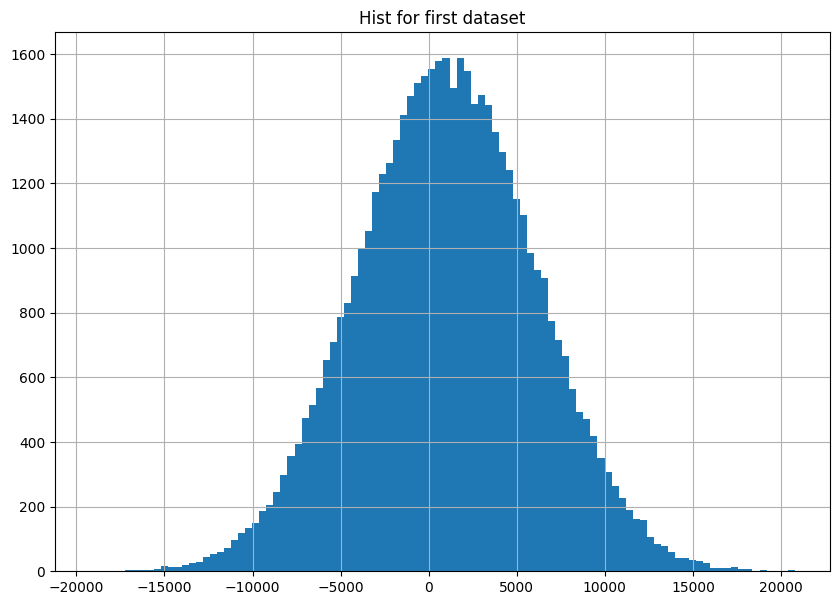

In [10]:
dfn.hist(bins=100)
plt.title("Hist for first dataset")

Text(0.5, 1.0, 'Hist for second dataset')

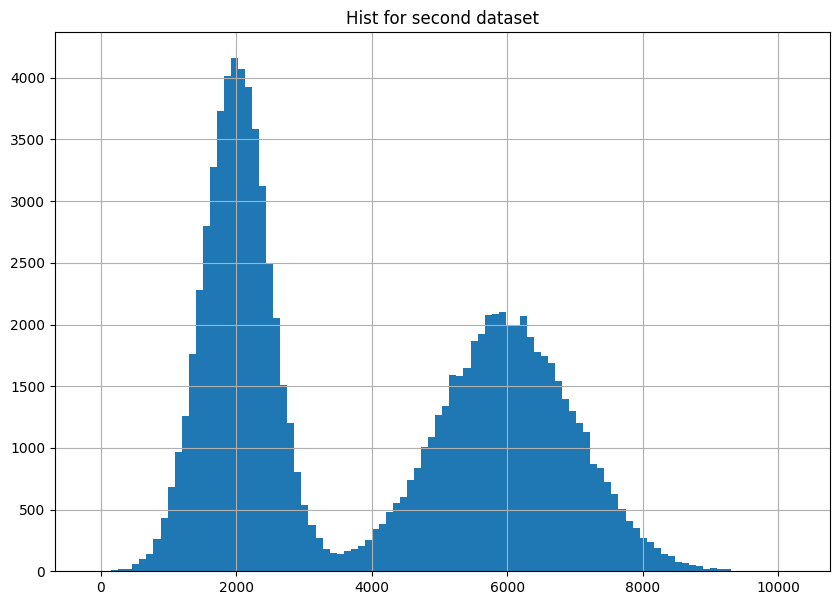

In [12]:
df1.hist(bins=100)
plt.title("Hist for second dataset")

In [13]:
dfn.describe()

,volume
count,50000.000000
mean,1014.692420
std,5045.796096
min,-19216.000000
25%,-2401.000000
50%,1010.000000
75%,4421.000000
max,20780.000000


In [14]:
df1.describe()

,volume
count,100000.000000
mean,4001.909940
std,2153.930144
min,-161.000000
25%,2001.000000
50%,3324.000000
75%,5996.000000
max,10246.000000


#### Правило 3 сигм

In [15]:
upper_level = dfn.volume.mean() + 3*dfn.volume.std()
lower_level = dfn.volume.mean() - 3*dfn.volume.std()
print(lower_level, upper_level)

-14122.695868621484 16152.080708621483


In [17]:
level_99 = np.percentile(dfn.volume, 99)
print(level_99)

12655.0


Text(0.5, 1.0, '3 sigma и 99 квантиль для нормального распределения')

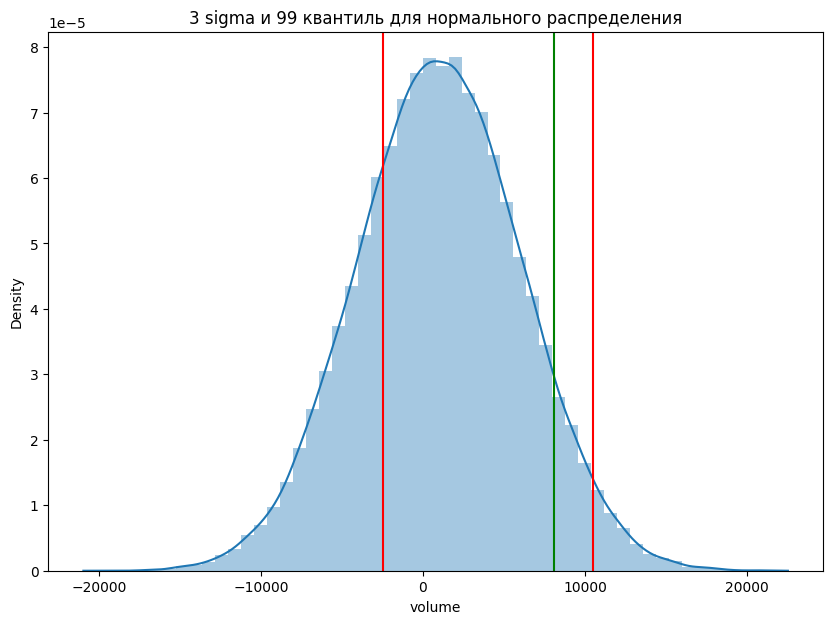

In [39]:
sns.distplot(dfn.volume)
plt.axvline(x=lower_level, color="r", linestyle="-")
plt.axvline(x=upper_level, color="r", linestyle="-")
plt.axvline(x=level_99, color="g", linestyle="-")
plt.title("3 sigma и 99 квантиль для нормального распределения")

In [19]:
dfn[dfn.volume >= upper_level].describe()

,volume
count,65.000000
mean,17576.861538
std,1096.751622
min,16228.000000
25%,16776.000000
50%,17405.000000
75%,18041.000000
max,20780.000000


In [20]:
upper_level = df1.volume.mean() + 3*df1.volume.std()
lower_level = df1.volume.mean() - 3*df1.volume.std()
print(lower_level, upper_level)

-2459.8804906684586 10463.700370668459


In [21]:
level_99 = np.percentile(df1.volume, 99)
print(level_99)

8071.0


Text(0.5, 1.0, '3 sigma и 99 квантиль для бимодального распределения')

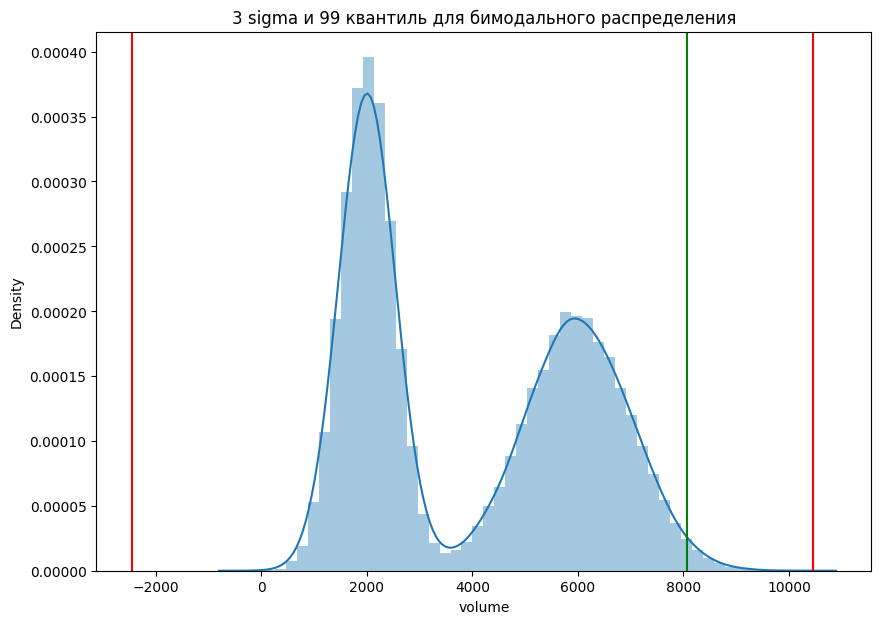

In [38]:
sns.distplot(df1.volume)
plt.axvline(x=lower_level, color="r", linestyle="-")
plt.axvline(x=upper_level, color="r", linestyle="-")
plt.axvline(x=level_99, color="g", linestyle="-")
plt.title("3 sigma и 99 квантиль для бимодального распределения")

In [24]:
df1[df1.volume >= upper_level].describe()

,volume
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


In [25]:
def find_anomaly(df, column):
    upper_level = df[column].mean() + 3*df[column].std()
    level_99 = np.percentile(df[column], 99)
    anomaly = df[(df[column] >= upper_level)^(df[column] >= level_99)]
    return anomaly, upper_level, level_99

In [26]:
medical = load_diabetes()

In [27]:
print(medical.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [28]:
df = pd.DataFrame(medical.data, columns=medical.feature_names)
df["health_status"] = medical.target
df.columns = map(str.lower, df.columns)
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,health_status
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [33]:
df.health_status.describe()

count    442.000000
mean     152.133484
std       77.093005
min       25.000000
25%       87.000000
50%      140.500000
75%      211.500000
max      346.000000
Name: health_status, dtype: float64

In [34]:
anomaly = find_anomaly(df, "health_status")
len(anomaly[0])/len(df)

0.011312217194570135

In [36]:
anomaly[0]

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,health_status
32,0.034443,0.050680,0.125287,0.028758,-0.053855,-0.012900,-0.102307,0.108111,0.000272,0.027917,341.0
138,0.034443,0.050680,0.111276,0.076958,-0.031840,-0.033881,-0.021311,-0.002592,0.028020,0.073480,336.0
256,-0.049105,-0.044642,0.160855,-0.046985,-0.029088,-0.019790,-0.047082,0.034309,0.028020,0.011349,346.0
290,0.059871,0.050680,0.076786,0.025315,0.001183,0.016849,-0.054446,0.034309,0.029935,0.044485,332.0
362,0.019913,0.050680,0.104809,0.070072,-0.035968,-0.026679,-0.024993,-0.002592,0.003709,0.040343,321.0


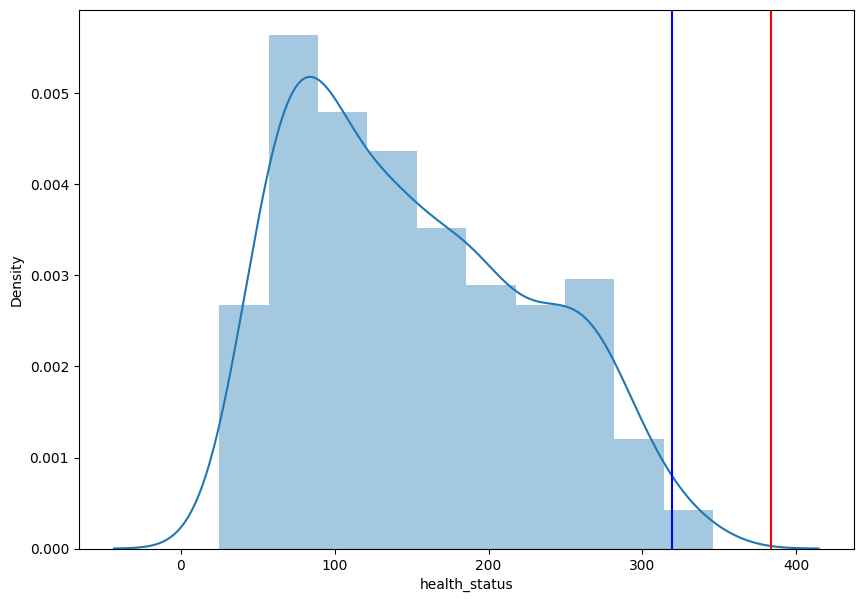

In [37]:
sns.distplot(df.health_status)
plt.axvline(x=anomaly[1], color="r", linestyle="-")
plt.axvline(x=anomaly[2], color="b", linestyle="-")